# 1 Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random
import numpy as np



2023-11-30 16:50:49.571455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2 Preparing the data

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
 
val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation and test data
 
train_generator = train_datagen.flow_from_directory(
    'images/Train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
 
validation_generator = val_test_datagen.flow_from_directory(
    'images/Validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
 
test_generator = val_test_datagen.flow_from_directory(
    'images/Test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 1182 images belonging to 2 classes.
Found 246 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


# 3.1 Define Model

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


# 3.6 Compiling the model

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# 3.7 Review the model

In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# 4. Train the model

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=37,  # Updated based on your dataset
    epochs=25,          # You can change this based on model performance
    validation_data=validation_generator,
    validation_steps=8, # Updated based on your dataset
    verbose=2)


Epoch 1/25
37/37 - 59s - loss: 0.6561 - accuracy: 0.6836 - val_loss: 0.4179 - val_accuracy: 0.8130 - 59s/epoch - 2s/step
Epoch 2/25
37/37 - 57s - loss: 0.3736 - accuracy: 0.8393 - val_loss: 0.2915 - val_accuracy: 0.8618 - 57s/epoch - 2s/step
Epoch 3/25
37/37 - 60s - loss: 0.3647 - accuracy: 0.8308 - val_loss: 0.4076 - val_accuracy: 0.8089 - 60s/epoch - 2s/step
Epoch 4/25
37/37 - 59s - loss: 0.3614 - accuracy: 0.8435 - val_loss: 0.2122 - val_accuracy: 0.9065 - 59s/epoch - 2s/step
Epoch 5/25
37/37 - 65s - loss: 0.3270 - accuracy: 0.8587 - val_loss: 0.2765 - val_accuracy: 0.8740 - 65s/epoch - 2s/step
Epoch 6/25
37/37 - 53s - loss: 0.2981 - accuracy: 0.8706 - val_loss: 0.2314 - val_accuracy: 0.9024 - 53s/epoch - 1s/step
Epoch 7/25
37/37 - 47s - loss: 0.2921 - accuracy: 0.8756 - val_loss: 0.2929 - val_accuracy: 0.9106 - 47s/epoch - 1s/step
Epoch 8/25
37/37 - 51s - loss: 0.2978 - accuracy: 0.8723 - val_loss: 0.2609 - val_accuracy: 0.8984 - 51s/epoch - 1s/step
Epoch 9/25
37/37 - 53s - loss: 0

# 5. Evaluate Model Perfomance 

NameError: name 'test_accuracy' is not defined

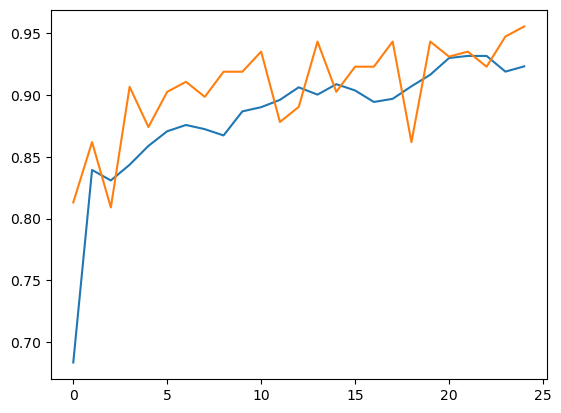

In [7]:
 
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.scatter(len(history.history['accuracy']), test_accuracy, label='Test Accuracy', marker='o', color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.scatter(len(history.history['loss']), test_loss, label='Test Loss', marker='o', color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()

# 6. Saving the model

In [8]:
model.save('indoor_outdoor_model.keras')



# 7. Making the predictions

1/1 [==============================] - 0s 142ms/step


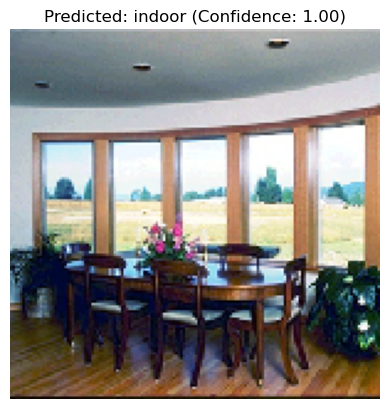

1/1 [==============================] - 0s 38ms/step


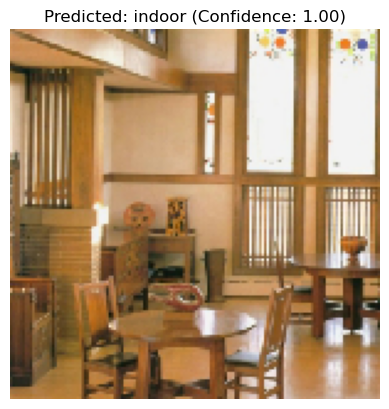

1/1 [==============================] - 0s 38ms/step


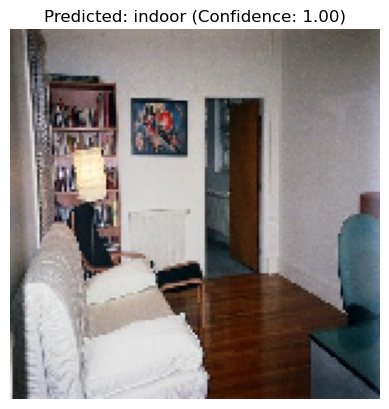

1/1 [==============================] - 0s 34ms/step


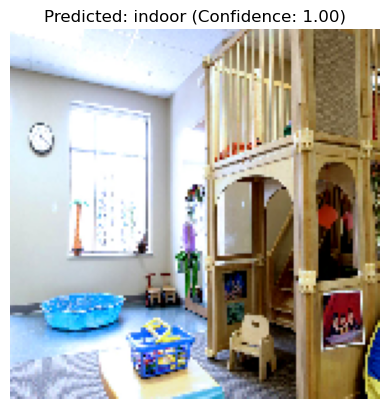

1/1 [==============================] - 0s 41ms/step


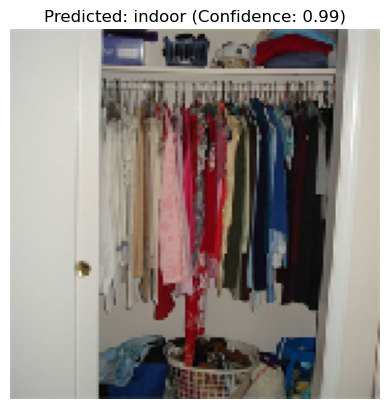

1/1 [==============================] - 0s 34ms/step


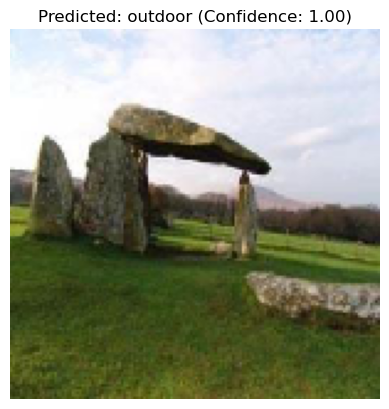

1/1 [==============================] - 0s 33ms/step


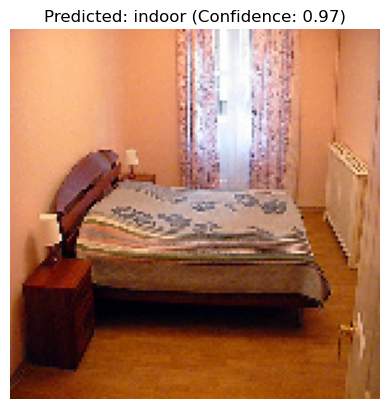

1/1 [==============================] - 0s 36ms/step


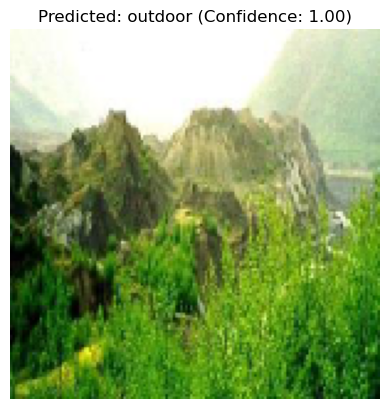

1/1 [==============================] - 0s 39ms/step


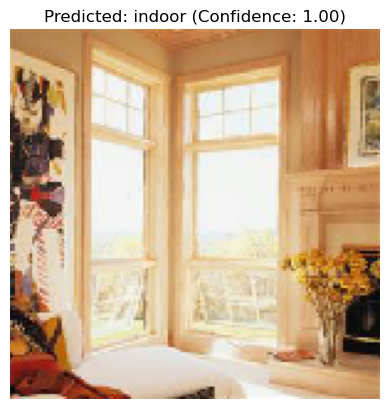

In [9]:
def get_random_images_from_directory(directory, n=10):
    all_files = []
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            files = [os.path.join(subdir_path, file) for file in os.listdir(subdir_path) if file.lower().endswith(('png', 'jpg', 'jpeg'))]
            all_files.extend(files)
    return random.sample(all_files, n)
def predict_and_visualize(image_paths, model):
    for image_path in image_paths:
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        img_array_expanded = np.expand_dims(img_array, axis=0)
        # Predict the class of the image
        prediction = model.predict(img_array_expanded)
        predicted_class = 'outdoor' if prediction[0] > 0.5 else 'indoor'
        confidence = prediction[0] if predicted_class == 'outdoor' else 1 - prediction[0]
        # Visualize the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class} (Confidence: {confidence[0]:.2f})")
        plt.axis('off')
        plt.show()
# Assuming the directories are structured with 'Indoor' and 'Outdoor' subdirectories
base_directories = ['images/Train', 'images/Validation', 'images/Test']
 
# Get 10 random images from these directories
random_images = []
for base_dir in base_directories:
    random_images.extend(get_random_images_from_directory(base_dir, n=3))  # Adjust n as needed to get a total of 10
    
    # Predict and visualize
predict_and_visualize(random_images, model)
